In [55]:
# Libreias

import pandas as pd             # Manipulación y análisis de datos
import scipy as sc              # Herramientas científicas avanzadas
import numpy as np              # Cálculo numérico y matrices
import h5py                     # Lectura de archivos HDF5
import matplotlib.pylab as plt  # Generación de gráficos
import os                       # Manejo de archivos y carpetas
import requests                 # Descargar archivos de internet
import sympy as sp              # Cálculo simbólico

In [56]:
# Descargar los datasets desde múltiples espejos (mirrors) para mayor fiabilidad

base_path = "/home/steven-sarmiento/002_EstudiantesAprendizajeEstadistico/semestre2025-2/Estudiantes/Sarmiento_8348/Labs/dataset/"

if not os.path.exists(base_path):
    os.makedirs(base_path)

# Lista de espejos (Mirrors) para asegurar la descarga
mirrors_train = [
    "https://raw.githubusercontent.com/rvarun7777/Deep_Learning/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/train_catvnoncat.h5",
    "https://raw.githubusercontent.com/JudasDie/deeplearning.ai/master/Neural%20Networks%20and%20Deep%20Learning/week4/datasets/train_catvnoncat.h5"
]

mirrors_test = [
    "https://raw.githubusercontent.com/rvarun7777/Deep_Learning/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5",
    "https://raw.githubusercontent.com/JudasDie/deeplearning.ai/master/Neural%20Networks%20and%20Deep%20Learning/week4/datasets/test_catvnoncat.h5"
]

def download_with_mirrors(mirrors, filename):
    filepath = os.path.join(base_path, filename)
    
    # Limpiamos archivo previo si existe para evitar corruptos
    if os.path.exists(filepath):
        os.remove(filepath)
        
    print(f"Iniciando descarga de: {filename}")
    
    for url in mirrors:
        try:
            print(f" -> Intentando desde: ...{url[-30:]}")
            r = requests.get(url, allow_redirects=True)
            
            if r.status_code == 200:
                with open(filepath, 'wb') as f:
                    f.write(r.content)
                
                # Verificación rápida de cabecera HDF5
                with open(filepath, 'rb') as f:
                    header = f.read(8)
                    if header.startswith(b'\x89HDF'):
                        print(" -> ¡ÉXITO! Archivo descargado y verificado.")
                        return 
                    else:
                        print(" -> ALERTA: Descargó algo, pero no parece un HDF5 válido.")
            else:
                print(f" -> Falló con código {r.status_code}")
                
        except Exception as e:
            print(f" -> Error de conexión: {e}")
            
    print(f"ERROR: No se pudo descargar {filename} de ningún espejo.")

# Ejecutar descargas
download_with_mirrors(mirrors_train, "train_catvnoncat.h5")
download_with_mirrors(mirrors_test, "test_catvnoncat.h5")

Iniciando descarga de: train_catvnoncat.h5
 -> Intentando desde: ...k/datasets/train_catvnoncat.h5
 -> ¡ÉXITO! Archivo descargado y verificado.
Iniciando descarga de: test_catvnoncat.h5
 -> Intentando desde: ...rk/datasets/test_catvnoncat.h5
 -> ¡ÉXITO! Archivo descargado y verificado.


In [57]:
# Cargar los datos
train_dataset = h5py.File(base_path + "train_catvnoncat.h5", "r")
test_dataset = h5py.File(base_path + "test_catvnoncat.h5", "r")
print("Datasets cargados en memoria.")

Datasets cargados en memoria.


In [58]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [59]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

In [60]:
np.shape(xtrain)

(209, 64, 64, 3)

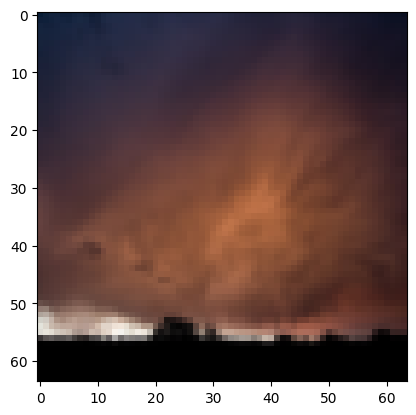

In [61]:
plt.imshow(xtrain[208])

In [62]:
np.shape(xtrain[0])

(64, 64, 3)

In [63]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], shape=(12288,), dtype=uint8)

In [64]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [65]:
len(xtrain_[208])

12288

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]}
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    


2. Construir un generalizacion de la red, en el que entrada el valor inicial y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

```python
A, nn = forward_pass(A0, nn_red)

```

3. Encontrar la funcion de coste.
$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

4. Construir un codigo que permita realizar el BackwardPropagation

# Backward Propagation

Para una capa  arbitraria tenemos que:

$$ d\Theta^{[l]} =  d\mathcal{Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'(\mathcal{Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]} $$

$$ db^{[l]} =  d\mathcal{Z}^{(i)[L]}  = dA^{(i)[l]} f'(\mathcal{Z}^{(i)[l]} ) $$

```python
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)

```

Los valores de dA pueden ser escritos como:

$$ dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]} $$

$$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $$

$$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1} $$

$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2} $$

$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3} $$

Para la capa L esima:

```python
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))

```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16} $$

$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17} $$

```

# **1. Estructura de Clases y Funciones de Activación**

In [66]:
def act_function(activation):
    """
    Devuelve la función de activación (f) y su derivada (fp).
    """
    if activation == "sigmoid":
        f = lambda x: 1 / (1 + np.exp(-x))
        fp = lambda x: f(x) * (1 - f(x))
        return f, fp
    
    elif activation == "tanh":
        f = lambda x: np.tanh(x)
        fp = lambda x: 1 - np.tanh(x)**2
        return f, fp
        
    elif activation == "relu":
        f = lambda x: np.maximum(0, x)
        fp = lambda x: (x > 0).astype(float)
        return f, fp
    
    else:
        # Por defecto identidad (útil para pruebas)
        return lambda x: x, lambda x: 1

class layer_nn():
    def __init__(self, act_fun_name, nlayer_present, nlayer_before):
        self.n_present = nlayer_present
        self.n_before = nlayer_before
        
        # Inicialización aleatoria centrada (User request: 2*rnd - 1)
        self.Theta = 2 * np.random.random((nlayer_present, nlayer_before)) - 1
        self.B = 2 * np.random.random((nlayer_present, 1)) - 1
        
        # Obtener funciones f y f'
        self.act_fun_name = act_fun_name
        self.f, self.fp = act_function(act_fun_name)
        
        # Variables para cache (necesarias para Backprop)
        self.Z = None
        self.A = None
        self.A_prev = None # Necesitamos guardar la entrada que recibió esta capa

    def output(self, Z, A):
        # Este método actualiza los valores internos tras el forward pass
        self.Z = Z
        self.A = A

# **2. Inicialización de la Red (Topology)**

In [67]:
def initialize_network(topology, activations):
    """
    topology: Lista [n_x, n_h1, ..., n_y]
    activations: Lista de strings con las activaciones (len = len(topology))
                 La primera activación (input) suele ser None o ignorada.
    """
    nn_red = []
    # Iteramos desde la capa 1 hasta L (la capa 0 es entrada)
    for l in range(1, len(topology)):
        # La capa actual tiene topology[l] neuronas
        # La capa anterior tiene topology[l-1] neuronas
        layer = layer_nn(
            act_fun_name=activations[l], 
            nlayer_present=topology[l], 
            nlayer_before=topology[l-1]
        )
        nn_red.append(layer)
    
    return nn_red

# **3. Forward Pass (Generalización)**

In [68]:
def forward_pass(A0, nn_red):
    A = A0 # La entrada inicial
    
    for layer in nn_red:
        # Guardamos A_prev antes de calcular el nuevo A, crucial para el backprop
        layer.A_prev = A 
        
        # Cálculo vectorizado
        Z = np.dot(layer.Theta, A) + layer.B
        A = layer.f(Z)
        
        # Guardamos en el objeto
        layer.output(Z, A)
        
    return A, nn_red

# **4. Función Coste**

In [69]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    epsilon = 1e-15 # Para evitar log(0)
    
    cost = -(1/m) * np.sum(
        Y * np.log(AL + epsilon) + (1 - Y) * np.log(1 - AL + epsilon)
    )
    return np.squeeze(cost) # Asegurar que sea un escalar

# **5. Backward Propagation y Gradiente Descendente**

In [70]:
def backward_propagation(Y, nn_red, learning_rate):
    m = Y.shape[1]
    epsilon = 1e-15
    
    # Inicializar backprop en la última capa
    last_layer = nn_red[-1]
    AL = last_layer.A
    
    # Derivada de la función de coste respecto a AL
    # dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
    dAL = - (np.divide(Y, AL + epsilon) - np.divide(1 - Y, 1 - AL + epsilon))
    
    # Variable acumuladora para el gradiente que viaja hacia atrás (dA actual)
    dA_curr = dAL
    
    # Iterar desde la última capa hacia la primera (L-1, ..., 0)
    for l in range(len(nn_red) - 1, -1, -1):
        layer = nn_red[l]
        
        # Cálculo de dZ (Ec: dZ = dA * f'(Z))
        # Element-wise multiplication
        dZ = dA_curr * layer.fp(layer.Z)
        
        # Cálculo de gradientes 
        # dTheta = (1/m) * dZ . A_prev.T
        dTheta = (1/m) * np.dot(dZ, layer.A_prev.T)
        
        # db = (1/m) * sum(dZ)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        
        # Calcular dA para la capa anterior para la siguiente iteración
        # dA_prev = Theta.T . dZ
        dA_prev = np.dot(layer.Theta.T, dZ)
        
        # Actualización de parámetros (Gradiente Descendente)
        layer.Theta = layer.Theta - learning_rate * dTheta
        layer.B = layer.B - learning_rate * db
        
        # Actualizar dA_curr para el siguiente paso del bucle
        dA_curr = dA_prev

    return nn_red

# **Ejemplo de ejecución**

In [71]:
# Aplanamos y Normalizamos 
# xtrain_ tiene forma (209, 12288) -> Queremos (12288, 209)
X_train = xtrain_.T 
X_test = xtest_.T

# Reajustamos las etiquetas (Y)
# train_label tiene forma (209,) -> Queremos (1, 209)
Y_train = np.array(train_label).reshape(1, -1)
Y_test = np.array(test_label).reshape(1, -1)

print(f"Forma de X_train: {X_train.shape}") 
print(f"Forma de Y_train: {Y_train.shape}") 

Forma de X_train: (12288, 209)
Forma de Y_train: (1, 209)


In [72]:
# n_x = 12288 (entradas)
# Capas ocultas
# n_y = 1 (salida: es gato o no es gato)
topology = [12288, 20, 7, 5, 1]
activations = [None, "relu", "relu", "relu", "sigmoid"]

# Inicializamos con la función que definimos antes
nn_red = initialize_network(topology, activations)

In [73]:
epochs = 2500
learning_rate = 0.0075 
costs = []

print("Iniciando entrenamiento del clasificador de gatos...")

for i in range(epochs):
    # Forward Pass
    AL, nn_red = forward_pass(X_train, nn_red)
    
    # Cálculo de Coste (cada 100 iteraciones)
    if i % 100 == 0:
        actual_cost = compute_cost(AL, Y_train)
        costs.append(actual_cost)
        print(f"Iteración {i} - Coste: {actual_cost:.6f}")
    
    # Backward Pass & Update
    nn_red = backward_propagation(Y_train, nn_red, learning_rate)

Iniciando entrenamiento del clasificador de gatos...
Iteración 0 - Coste: 14.749547
Iteración 100 - Coste: 0.615870
Iteración 200 - Coste: 0.605747
Iteración 300 - Coste: 0.598206
Iteración 400 - Coste: 0.592877
Iteración 500 - Coste: 0.587847
Iteración 600 - Coste: 0.581418
Iteración 700 - Coste: 0.577248
Iteración 800 - Coste: 0.572818
Iteración 900 - Coste: 0.563642
Iteración 1000 - Coste: 0.558227
Iteración 1100 - Coste: 0.552670
Iteración 1200 - Coste: 0.540951
Iteración 1300 - Coste: 0.532194
Iteración 1400 - Coste: 0.524352
Iteración 1500 - Coste: 0.519411
Iteración 1600 - Coste: 0.512218
Iteración 1700 - Coste: 0.505854
Iteración 1800 - Coste: 0.494909
Iteración 1900 - Coste: 0.487760
Iteración 2000 - Coste: 0.481613
Iteración 2100 - Coste: 0.471841
Iteración 2200 - Coste: 0.465837
Iteración 2300 - Coste: 0.459924
Iteración 2400 - Coste: 0.453858


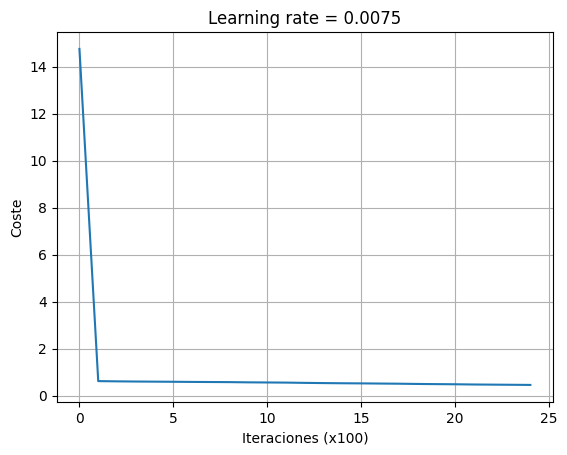

In [74]:
# Graficar el aprendizaje
plt.plot(costs)
plt.ylabel('Coste')
plt.xlabel('Iteraciones (x100)')
plt.title(f"Learning rate = {learning_rate}")
plt.grid()
plt.show()

In [75]:
def predict(X, nn_red):
    AL, _ = forward_pass(X, nn_red)
    # Si la probabilidad es > 0.5, es un gato (1), si no (0)
    predictions = (AL > 0.5).astype(int)
    return predictions

pred_train = predict(X_train, nn_red)
pred_test = predict(X_test, nn_red)

print(f"\nPrecisión en Entrenamiento: {np.mean(pred_train == Y_train) * 100:.2f}%")
print(f"Precisión en Test: {np.mean(pred_test == Y_test) * 100:.2f}%")


Precisión en Entrenamiento: 77.99%
Precisión en Test: 42.00%


In [76]:
def visualize_predictions(X, Y, labels, index, nn_red):
    # Re-escalar para mostrar la imagen correctamente (64, 64, 3)
    plt.imshow(X[:, index].reshape(64, 64, 3))
    
    # Propagación para obtener la probabilidad
    y_prob, _ = forward_pass(X[:, index:index+1], nn_red)
    
    # Extraer el escalar del array antes de comparar y convertir
    # y_prob[0,0] accede al valor dentro de la matriz (1,1)
    y_pred = int(y_prob[0, 0] > 0.5)
    
    true_label = int(Y[0, index])
    
    plt.title(f"Original: {true_label} | Pred: {y_pred} (Prob: {y_prob[0,0]:.4f})")
    plt.axis('off')
    plt.show()

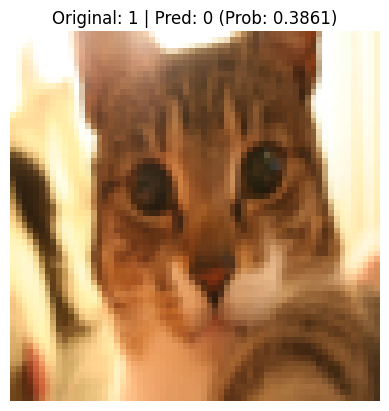

In [77]:
# Cambia el índice para ver fotos de gatos (1) o no gatos (0) en el set de TEST
visualize_predictions(X_test, Y_test, test_classes, index=11, nn_red=nn_red)